# **Assignment 5: RISK**




**Dice Rolls**
-   Attacker rolls up to 3 dice. This depends on how many troops the attacker has. The attacker can roll 1, 2, or 3 dice, but they must have at least as many troops as the number of dice they wish to roll.
-   Defender rolls up to 2 dice. The defender can roll 1 or 2 dice depending on how many troops they have. If the defender has only 1 troop, they can only roll 1 die.

**Simulate multiple rounds of battles**, 
-   where the attacker and defender roll their dice and compare them.
-   The highest dice of each side are compared first, the second highest next, and so on.
-   If the attacker's dice is higher, the defender loses a troop. If the defender's dice is higher, the attacker loses a troop.

**Goal:** Simulate 1000 rounds of battles and track how many times the attacker or defender loses a troop in total.


Attack(n_attackers=1, n_defenders=1)
Attacker losses: 94, Defender losses: 72

Attack(n_attackers=1, n_defenders=2)
Attacker losses: 126, Defender losses: 40

Attack(n_attackers=2, n_defenders=1)
Attacker losses: 64, Defender losses: 102

Attack(n_attackers=2, n_defenders=2)
Attacker losses: 192, Defender losses: 140

Attack(n_attackers=3, n_defenders=1)
Attacker losses: 58, Defender losses: 108

Attack(n_attackers=3, n_defenders=2)
Attacker losses: 156, Defender losses: 176



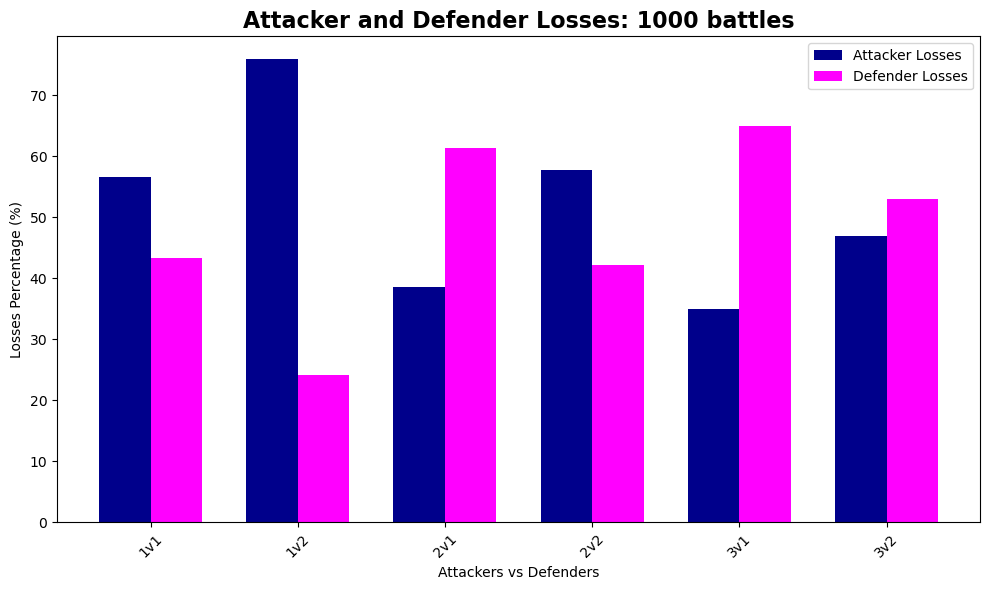

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from typing import NamedTuple 

num_battles = 1000  # Number of battles to simulate

class Attack(NamedTuple):
    n_attackers: int
    n_defenders: int

# Define the different combinations of attackers and defenders
options = [
    Attack(x, y) for x in range(1, 4) for y in range(1, 3)
]

# Initialize random number generator
rng = np.random.default_rng()

# Store results to plot later
attacker_losses = []
defender_losses = []

# Distribute battles equally across the 6 combinations
battles_per_option = num_battles // len(options)  # Dividing total battles by number of options (6). 

# Simulate battles for each combination of attackers and defenders
for option in options:
    print(option)

    # Generate attacker's and defender's dice rolls
    attack = rng.integers(1, 7, size=(battles_per_option, option.n_attackers))
    attack.sort(axis=1)
    attack = np.flip(attack, axis=1)  # Flip to descending order

    defence = rng.integers(1, 7, size=(battles_per_option, option.n_defenders))
    defence.sort(axis=1)
    defence = np.flip(defence, axis=1)  # Flip to descending order

    # Compare up to the minimum number of dice
    min_length = min(attack.shape[1], defence.shape[1])
    result = attack[:, :min_length] > defence[:, :min_length]

    # Calculate losses for both attacker and defender
    losses_attacker = np.sum(result == False)  # Attacker loses where result is False
    losses_defender = np.sum(result == True)   # Defender loses where result is True

    print(f"Attacker losses: {losses_attacker}, Defender losses: {losses_defender}\n")
    
    # Store the results for plotting
    attacker_losses.append(losses_attacker / (battles_per_option * min_length) * 100)  # Convert to percentage
    defender_losses.append(losses_defender / (battles_per_option * min_length) * 100)  # Convert to percentage

# Prepare the bar chart
labels = [f"{option.n_attackers}v{option.n_defenders}" for option in options]
x_pos = np.arange(len(labels))

# Plotting the bar chart with two bars for each simulation (attacker losses and defender losses)
bar_width = 0.35
plt.figure(figsize=(10, 6))

# Plotting the attacker and defender losses side by side
plt.bar(x_pos - bar_width / 2, attacker_losses, bar_width, label='Attacker Losses', color='darkblue')
plt.bar(x_pos + bar_width / 2, defender_losses, bar_width, label='Defender Losses', color='magenta')

# Adding labels and title
plt.xticks(x_pos, labels, rotation=45)
plt.xlabel('Attackers vs Defenders')
plt.ylabel('Losses Percentage (%)')
plt.title('Attacker and Defender Losses: 1000 battles', fontsize=16, fontweight='bold')

# Show legend
plt.legend()

# Adjust layout and display the chart
plt.tight_layout()
plt.show()


-   1v1: defender
-   1v2: defender
-   2v1: attacker
-   2v2: defender
-   3v1: attacker
-   3v2: attacker 

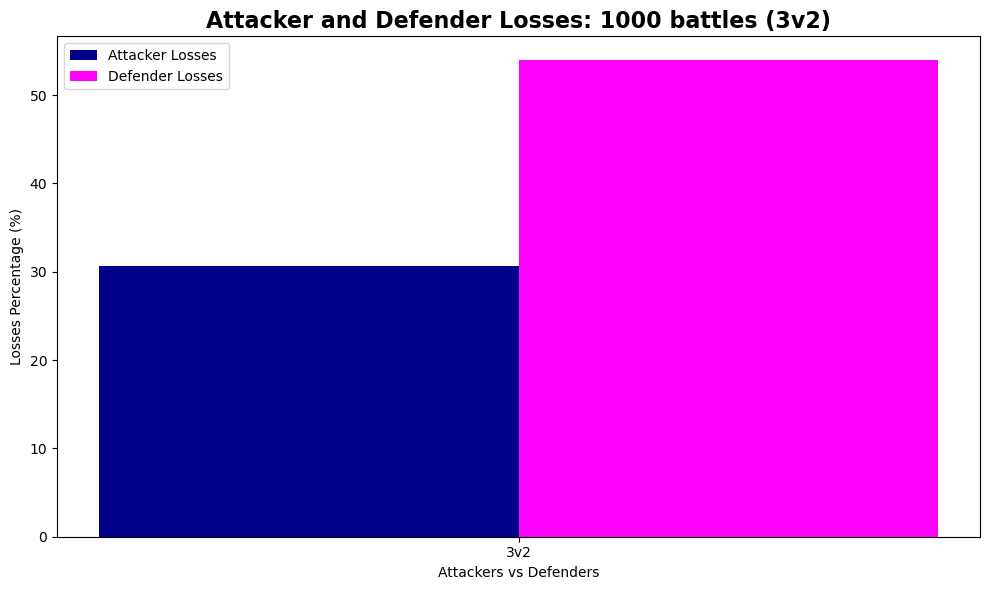

In [6]:
import numpy as np
import matplotlib.pyplot as plt

num_battles = 1000  # Number of battles to simulate

# Define the number of attackers and defenders (3 attackers vs 2 defenders)
n_attackers = 3
n_defenders = 2

# Initialize random number generator
rng = np.random.default_rng()

# Store results to plot later
attacker_losses = []
defender_losses = []

# Simulate battles for the 3 attackers vs 2 defenders
battles_per_option = num_battles  # All battles are for the 3v2 combination

# Simulate battles
for _ in range(battles_per_option):
    # Generate attacker's and defender's dice rolls
    attack = rng.integers(1, 7, size=(1, n_attackers))
    attack.sort(axis=1)
    attack = np.flip(attack, axis=1)  # Flip to descending order

    defence = rng.integers(1, 7, size=(1, n_defenders))
    defence.sort(axis=1)
    defence = np.flip(defence, axis=1)  # Flip to descending order

    # Compare the dice up to the minimum number of dice
    min_length = min(attack.shape[1], defence.shape[1])
    result = attack[:, :min_length] > defence[:, :min_length]

    # Calculate losses for both attacker and defender
    losses_attacker = np.sum(result == False)  # Attacker loses where result is False
    losses_defender = np.sum(result == True)   # Defender loses where result is True

    # Store the results for plotting
    attacker_losses.append(losses_attacker)
    defender_losses.append(losses_defender)

# Calculate the percentages of losses
attacker_loss_percentage = (np.sum(attacker_losses) / (num_battles * n_attackers)) * 100
defender_loss_percentage = (np.sum(defender_losses) / (num_battles * n_defenders)) * 100

# Prepare the bar chart
labels = ['3v2']
x_pos = np.arange(len(labels))

# Plotting the bar chart with two bars for attacker and defender losses
bar_width = 0.35
plt.figure(figsize=(10, 6))

plt.bar(x_pos - bar_width / 2, [attacker_loss_percentage], bar_width, label='Attacker Losses', color='darkblue')
plt.bar(x_pos + bar_width / 2, [defender_loss_percentage], bar_width, label='Defender Losses', color='magenta')

# Adding labels and title
plt.xticks(x_pos, labels)
plt.xlabel('Attackers vs Defenders')
plt.ylabel('Losses Percentage (%)')
plt.title('Attacker and Defender Losses: 1000 battles (3v2)', fontsize=16, fontweight='bold')

# Show legend
plt.legend()

# Adjust layout and display the chart
plt.tight_layout()
plt.show()


*** 
### **Explanation of code**


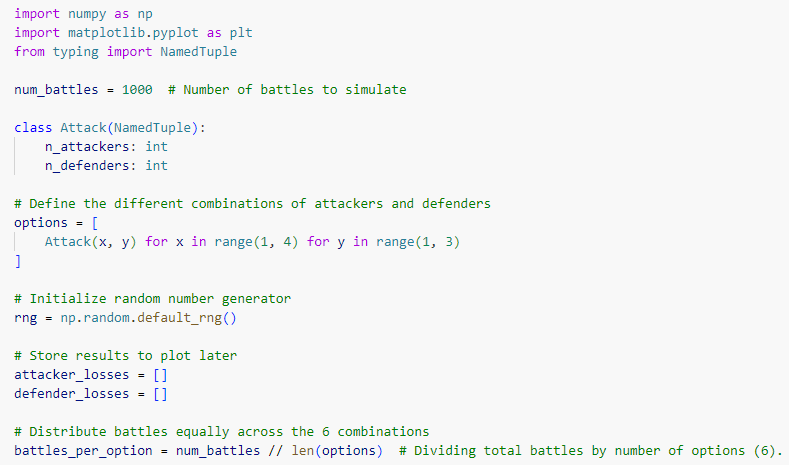

```num_battles = 1000```
-   1000 repetitions ran for each combination of attackers and defenders. 

```class Attack(NamedTuple):```
-   The code uses a class Attack using pythons NamedTuple which is a subclass of pythons built in tuple,each element can be accessed by name. 
-   the class has two attributes: ```n_attackers``` and ```n_defenders```(number of attackers and defenders.)
-   Each instance of this class will represent one scenario in which a specific number of attackers and defenders are in a battle. 

```options=[Attack(x,y) for x in range (1,4) for y in range(1,3)]```
-   This creates a list that generates combinations of attackers and defenders. it loops through values of x and y. 
-   x (attackers takes values from 1-3)
-   y (defenders takes values from 1-2)
-   Result:(1,1), (1,2), (2,1), (2,2), (3,1), (3,2)

```rng=np.random.default_rng()```
-   This uses NumPy's random number generator to simulate dice rolls for both attackers and defenders. 

```attacker_losses=[] defender_losses=[]```
-   Empty lists that will be used in later parts of the code to store the losses percentage of attackers and defenders. 

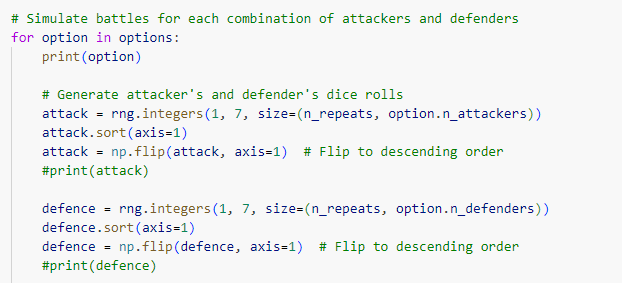



```For option in options:``` 
-   options is a list of different configurations possible such as 1 attacker vs 1 defender (1,1) etc. the code loops over all possible combinations. 
-   option refers to one such configuration for example attack (2,1) 


```attack = rng.integers(1,7, size=(n_repeats, option.n_attackers))```

-   this generates random dice rolls for the attackers. it generates n_repeats rows of dice rolls for the attackers, where each row has option.n_attackers dice rolls
-   n_repeats: how many times to repeat the simulation. 
-   option.n_attackers: number of dice rolls (attackers) in the current configuration.

```attack.sort(axis=1)```
```attack = np.flip(attack, axis=1)```

-   sort the dice rolls to ensure that they are in ascending order, lowest to highest for each simulation. 
-   flip the sorted rolls: in risk, the highest dice roll is the most important, the code then flips the sorted dice, so that the highest rolls are placed first so as to simulate rolling the dice in descending order. 

```defence = rng.integers(1, 7, size=(n_repeats, option.n_defenders))```
```defence.sort(axis=1)```
```defence = np.flip(defence, axis=1)```
-   similar to the attackers dice rolls this generates num_battles rows of dice rolls for the defenders, where each row has option.n.defenders dice rolls. 
-   like with the attackers the rolls are sorted in ascending order and then flipped to descending order to prioritize higher rolls. 


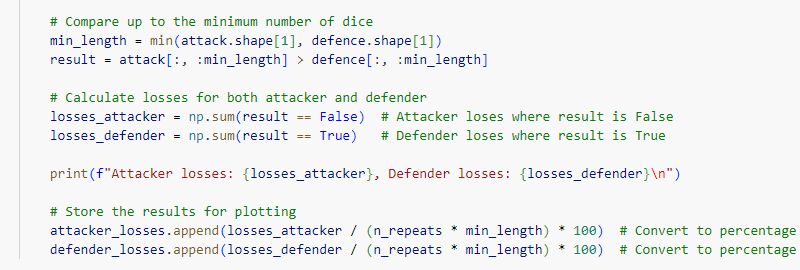

```min_length = min(attack.shape[1], defence.shape[1])```
-   determines the minimum amount of dice. 
-   compares the same number of dice between the attacker and defenders. example: if there is 3 attackers and 2 defenders, only the top two dice should be compared. 

```attack[:, :min_length]``` and ```defence[:, :min_length]```
-   slice the arrays to the minimum length ensuring that the comparison only occurs for the minimum number of dice. 

The dice rolls of the attackers are compared to the dice rolls of the defenders creating a boolean array where *True* means the attacker wins by having a higher dice number while *False* means that the defender wins by either having a higher dice number or an equal number as defenders win ties. <br>
The percentage of losses for both the attacker and defender is calculated and appended to the attacker_losses and defender_losses lists. This percentage is calculated by dividing the number of losses by the total number of comparisons (which is n_repeats * min_length), and then multiplying by 100 to convert it to a percentage.

```labels = [f"{option.n_attackers}v{option.n_defenders}" for option in options]```
-   creates a list of string labels
-   Each label corresponds to the combination of attackers and defenders, for example 3v2 for 3 attackers and 2 defenders. 
-   options.n_attackers and options.n_defenders come from the list of attack combinations defined in options earlier in the code. (options=[Attack(x,y) for x in range (1,4) for y in range (1,3)])
-   Result: List of labels [1v1, 1v2, 2v1, 2v2, 3v1, 3v2]



***

In [6]:
# References:

# https://thepythoncodingbook.com/2022/12/30/using-python-numpy-to-improve-board-game-strategy-risk/
# https://stackoverflow.com/questions/74421396/risk-game-with-python 